### Obtener en un Dataframe, todos los registros de los personajes StarWars (solo campos clave dese name hasta gender).

In [17]:
# Importación de dependencias
import pandas as pd
import numpy as np
import requests
from matplotlib import pyplot as plt

In [2]:
# Inicialización de requests
req_js = requests.get("https://swapi.dev/api/").json()

In [3]:
print(req_js)

{'people': 'https://swapi.dev/api/people/', 'planets': 'https://swapi.dev/api/planets/', 'films': 'https://swapi.dev/api/films/', 'species': 'https://swapi.dev/api/species/', 'vehicles': 'https://swapi.dev/api/vehicles/', 'starships': 'https://swapi.dev/api/starships/'}


In [4]:
# Creación de diccionario base para posterior importación a dataframe
dicc = {'name':[], 'height':[], 'mass':[], 'hair_color':[], 'skin_color':[], 'eye_color':[], 'birth_year':[], 'gender':[]}

In [5]:
# El registro people/17/ no existe en SWAPI
persons = list(range(1,84))
persons.remove(17)
print(persons)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]


In [6]:
for i in persons:
    persona = requests.get(f"https://swapi.dev/api/people/{i}/").json()
    for key in dicc.keys():
        dicc[key].append(persona[key])

In [7]:
# Comprobación de número de registros
len(dicc['name'])

82

In [8]:
# Creación de dataframe
data = pd.DataFrame.from_dict(dicc)
data

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male
4,Leia Organa,150,49,brown,light,brown,19BBY,female
...,...,...,...,...,...,...,...,...
77,Grievous,216,159,none,"brown, white","green, yellow",unknown,male
78,Tarfful,234,136,brown,brown,blue,unknown,male
79,Raymus Antilles,188,79,brown,light,brown,unknown,male
80,Sly Moore,178,48,none,pale,white,unknown,female


### Muestra el peso medio por género ('n/a') se contabilizará como un género más.

In [9]:
# Verificación de valores presentes en columna 'mass'
data['mass'].unique()

array(['77', '75', '32', '136', '49', '120', '84', 'unknown', '112', '80',
       '74', '1,358', '110', '17', '78.2', '140', '113', '79', '83', '20',
       '68', '89', '90', '45', '66', '82', '40', '55', '15', '65', '87',
       '50', '85', '56.2', '102', '88', '48', '57', '159'], dtype=object)

In [10]:
# Eliminación de coma para garantizar valores numéricos en la columna 'mass'
data['mass'] = data['mass'].apply(lambda x: x.replace(',',''))

In [11]:
# Comprobación de valores numéricos
data['mass'].unique()

array(['77', '75', '32', '136', '49', '120', '84', 'unknown', '112', '80',
       '74', '1358', '110', '17', '78.2', '140', '113', '79', '83', '20',
       '68', '89', '90', '45', '66', '82', '40', '55', '15', '65', '87',
       '50', '85', '56.2', '102', '88', '48', '57', '159'], dtype=object)

In [12]:
# Creación de dataframe donde se descartan valores 'unknown' en la columna 'mass'
data1 = data[data['mass'] != 'unknown'].copy()

In [13]:
# Comprobación de valores numéricos
data1.mass.unique()

array(['77', '75', '32', '136', '49', '120', '84', '112', '80', '74',
       '1358', '110', '17', '78.2', '140', '113', '79', '83', '20', '68',
       '89', '90', '45', '66', '82', '40', '55', '15', '65', '87', '50',
       '85', '56.2', '102', '88', '48', '57', '159'], dtype=object)

In [14]:
# Transformación a valores float
data1.mass = data1.mass.apply(lambda x: float(x))

In [15]:
data1.groupby('gender')['mass'].mean()

gender
female             54.020000
hermaphrodite    1358.000000
male               81.004545
n/a                46.333333
none              140.000000
Name: mass, dtype: float64

### Muestra gráficamente de la mejor forma posible si existe relación entre el peso y la altura de los personajes

In [16]:
# Comprobación de valores numéricos en height
data1['height'].unique()

array(['172', '167', '96', '202', '150', '178', '165', '97', '183', '182',
       '188', '228', '180', '173', '175', '170', '66', '200', '190',
       '177', '88', '160', '193', '191', '185', '196', '224', '112', '79',
       '94', '163', '198', '184', '166', '168', '229', '216', '234',
       '206'], dtype=object)

In [25]:
# Asignación de datatype como integer para manipulación en matplotlib
data1['height'] = data1['height'].astype('int')

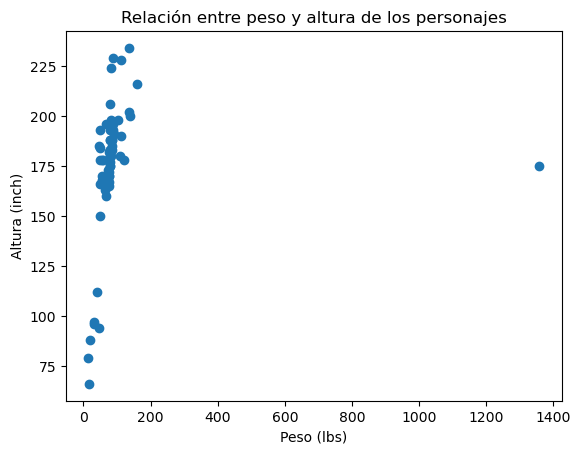

In [27]:
plt.scatter(data1.mass, data1.height)
plt.xlabel('Peso (lbs)')
plt.ylabel('Altura (inch)')
plt.title('Relación entre peso y altura de los personajes')
plt.show()

Observamos que la mayoría de los personajes pesan menos de 200 libras (90.7 kg), pudiendo llegar a medir más de 225 pulgadas de alto (5.7 metros). Hay un outlier que pesa cerca ded 1,400 libras (635 kg).

### Muestra gráficamente de la mejor forma posible el valor promedio de la altura en función del color de ojos (puedes filtrar todos aquellos personajes cuyo color de ojos no sea > 1)

In [28]:
# Visualización de color de ojos disponibles
data['eye_color'].unique()

array(['blue', 'yellow', 'red', 'brown', 'blue-gray', 'black', 'orange',
       'hazel', 'pink', 'unknown', 'red, blue', 'gold', 'green, yellow',
       'white'], dtype=object)

In [29]:
# Creación de dataframe sin datos 'unknown' en columna 'eye_color'
data2 = data[data['eye_color'] != 'unknown'].copy()

In [43]:
data2.eye_color.unique()

array(['blue', 'yellow', 'red', 'brown', 'blue-gray', 'black', 'orange',
       'hazel', 'pink', 'red, blue', 'gold', 'green, yellow', 'white'],
      dtype=object)

In [34]:
# Localización del valor 'unknown' en la columna 'height'
data2[data2.height == 'unknown']

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender
27,Arvel Crynyd,unknown,unknown,brown,fair,brown,unknown,male


In [38]:
# Eliminación de valor 'unknown'
data2.drop(data2[data2['height'] == 'unknown'].index, inplace=True)

In [39]:
# Comprobación
data2[data2.height == 'unknown']

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender


In [41]:
# Cambio de datatype de columna 'height'
data2['height'] = data2['height'].astype('int')

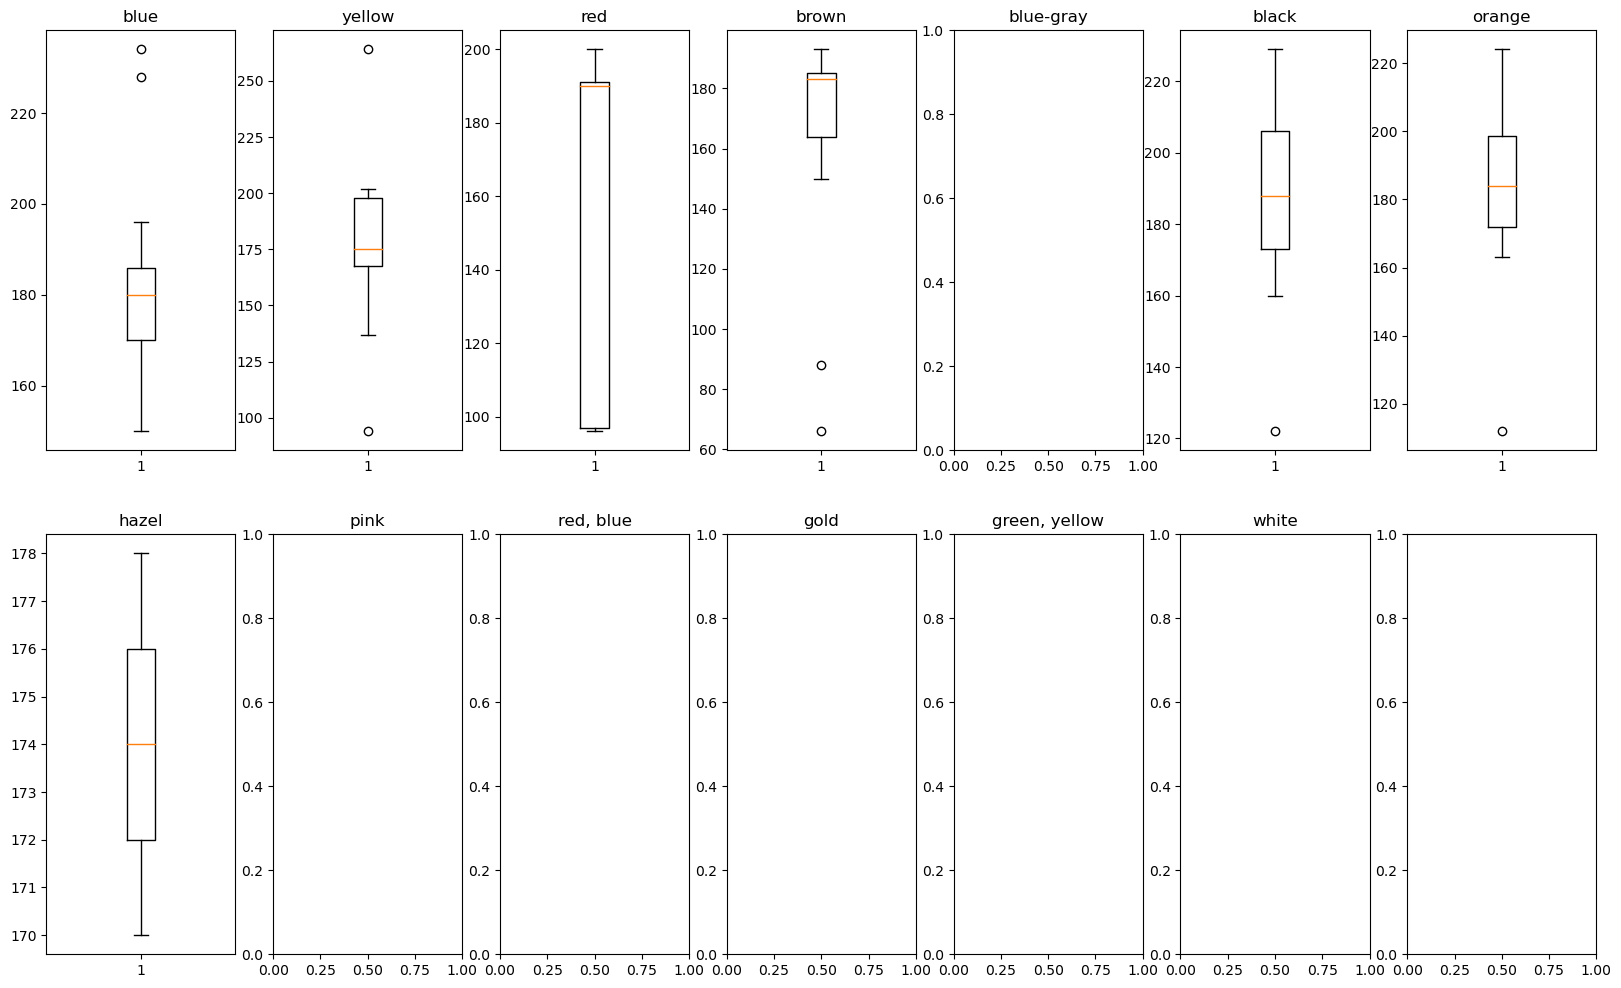

In [80]:
# Creación de gráficas boxplot con ayuda de subplots, axes.flatten() y enumerate

eye_colors = list(data2.eye_color.unique())

fig, axes = plt.subplots(2,7, figsize=(20,12))

axes = axes.flatten()

for i, eye_color in enumerate(eye_colors):
    ax = axes[i]
    box = data2[data2['eye_color'] == eye_color]['height']
    if box.count() == 1:
        pass
    else:
          ax.boxplot(box, vert=True)
    ax.set_title(eye_color)

Se omitieron gráficas sin valores mayores a 1

_Erick Lara_